In [4]:
import os
import ipyparallel as parallel
rc = parallel.Client()
dv = rc[:]
rc.ids

[0, 1, 2]

In [6]:
%matplotlib inline

In [7]:
def publish_it():
    from IPython.kernel.zmq.datapub import publish_data
    publish_data(dict(a='hi'))

In [8]:
ar = dv.apply_async(publish_it)

In [9]:
ar.data

[{'a': 'hi'}, {'a': 'hi'}, {'a': 'hi'}]

In [10]:
def simulation_loop():
    from IPython.kernel.zmq.datapub import publish_data
    import time
    import numpy as np
    for i in range(10):
        publish_data(dict(a=np.random.rand(20), i=i))
        time.sleep(1)

In [11]:
ar = dv.apply_async(simulation_loop)

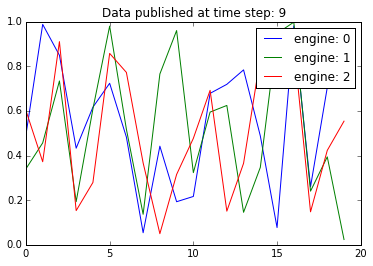

In [12]:
import matplotlib.pyplot as plt
data = ar.data
for i, d in enumerate(data):
    plt.plot(d['a'], label='engine: '+str(i))
plt.title('Data published at time step: ' + str(data[0]['i']))
plt.legend()